In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

import numpy as np

In [2]:
import torchvision
import torchvision.transforms as transforms

In [3]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

In [4]:
trainset = torchvision.datasets.CIFAR10(root='../../data',
                                       train=True,
                                       download=True,
                                       transform=transform)
testset = torchvision.datasets.CIFAR10(root='../../data',
                                      train=False,
                                      download=True,
                                      transform=transform)

Files already downloaded and verified
Files already downloaded and verified


https://pytorch.org/docs/stable/torchvision/datasets.html

![image.png](2.png)

In [5]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ../../data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [6]:
testset

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ../../data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [7]:
# batch = 8 이면 이미지의 크기는 batchsize * color * H * W
# 8 * 3(RGB) * 32 * 32
# num_workers 는 CPU를 몇개 사용할거냐 ->
trainloader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)

testloader = DataLoader(testset, batch_size=8, shuffle=True, num_workers=2)

In [8]:
classes=('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [9]:
def imshow(img):
    img = img / 2 +0.5 # unnormalize
    np_img = img.numpy()
    # plt.imshow(np_img)
    # ToTensor는 HWC로 바꿔주는데 , transpose를 써서 H를 1번 W를2번 C를 0번으로
    plt.imshow(np.transpose(np_img, (1,2,0)))
    
    print(np_img.shape)
    print((np.transpose(np_img, (1,2,0))).shape)

In [10]:
#dataiter = iter(trainloader)
#images, labels = dataiter.next()
 
for n, (img, labels) in enumerate(trainloader):
    print(n, img.shape, labels.shape)


0 torch.Size([8, 3, 32, 32]) torch.Size([8])
1 torch.Size([8, 3, 32, 32]) torch.Size([8])
2 torch.Size([8, 3, 32, 32]) torch.Size([8])
3 torch.Size([8, 3, 32, 32]) torch.Size([8])
4 torch.Size([8, 3, 32, 32]) torch.Size([8])
5 torch.Size([8, 3, 32, 32]) torch.Size([8])
6 torch.Size([8, 3, 32, 32]) torch.Size([8])
7 torch.Size([8, 3, 32, 32]) torch.Size([8])
8 torch.Size([8, 3, 32, 32]) torch.Size([8])
9 torch.Size([8, 3, 32, 32]) torch.Size([8])
10 torch.Size([8, 3, 32, 32]) torch.Size([8])
11 torch.Size([8, 3, 32, 32]) torch.Size([8])
12 torch.Size([8, 3, 32, 32]) torch.Size([8])
13 torch.Size([8, 3, 32, 32]) torch.Size([8])
14 torch.Size([8, 3, 32, 32]) torch.Size([8])
15 torch.Size([8, 3, 32, 32]) torch.Size([8])
16 torch.Size([8, 3, 32, 32]) torch.Size([8])
17 torch.Size([8, 3, 32, 32]) torch.Size([8])
18 torch.Size([8, 3, 32, 32]) torch.Size([8])
19 torch.Size([8, 3, 32, 32]) torch.Size([8])
20 torch.Size([8, 3, 32, 32]) torch.Size([8])
21 torch.Size([8, 3, 32, 32]) torch.Size([8]

250 torch.Size([8, 3, 32, 32]) torch.Size([8])
251 torch.Size([8, 3, 32, 32]) torch.Size([8])
252 torch.Size([8, 3, 32, 32]) torch.Size([8])
253 torch.Size([8, 3, 32, 32]) torch.Size([8])
254 torch.Size([8, 3, 32, 32]) torch.Size([8])
255 torch.Size([8, 3, 32, 32]) torch.Size([8])
256 torch.Size([8, 3, 32, 32]) torch.Size([8])
257 torch.Size([8, 3, 32, 32]) torch.Size([8])
258 torch.Size([8, 3, 32, 32]) torch.Size([8])
259 torch.Size([8, 3, 32, 32]) torch.Size([8])
260 torch.Size([8, 3, 32, 32]) torch.Size([8])
261 torch.Size([8, 3, 32, 32]) torch.Size([8])
262 torch.Size([8, 3, 32, 32]) torch.Size([8])
263 torch.Size([8, 3, 32, 32]) torch.Size([8])
264 torch.Size([8, 3, 32, 32]) torch.Size([8])
265 torch.Size([8, 3, 32, 32]) torch.Size([8])
266 torch.Size([8, 3, 32, 32]) torch.Size([8])
267 torch.Size([8, 3, 32, 32]) torch.Size([8])
268 torch.Size([8, 3, 32, 32]) torch.Size([8])
269 torch.Size([8, 3, 32, 32]) torch.Size([8])
270 torch.Size([8, 3, 32, 32]) torch.Size([8])
271 torch.Siz

666 torch.Size([8, 3, 32, 32]) torch.Size([8])
667 torch.Size([8, 3, 32, 32]) torch.Size([8])
668 torch.Size([8, 3, 32, 32]) torch.Size([8])
669 torch.Size([8, 3, 32, 32]) torch.Size([8])
670 torch.Size([8, 3, 32, 32]) torch.Size([8])
671 torch.Size([8, 3, 32, 32]) torch.Size([8])
672 torch.Size([8, 3, 32, 32]) torch.Size([8])
673 torch.Size([8, 3, 32, 32]) torch.Size([8])
674 torch.Size([8, 3, 32, 32]) torch.Size([8])
675 torch.Size([8, 3, 32, 32]) torch.Size([8])
676 torch.Size([8, 3, 32, 32]) torch.Size([8])
677 torch.Size([8, 3, 32, 32]) torch.Size([8])
678 torch.Size([8, 3, 32, 32]) torch.Size([8])
679 torch.Size([8, 3, 32, 32]) torch.Size([8])
680 torch.Size([8, 3, 32, 32]) torch.Size([8])
681 torch.Size([8, 3, 32, 32]) torch.Size([8])
682 torch.Size([8, 3, 32, 32]) torch.Size([8])
683 torch.Size([8, 3, 32, 32]) torch.Size([8])
684 torch.Size([8, 3, 32, 32]) torch.Size([8])
685 torch.Size([8, 3, 32, 32]) torch.Size([8])
686 torch.Size([8, 3, 32, 32]) torch.Size([8])
687 torch.Siz

917 torch.Size([8, 3, 32, 32]) torch.Size([8])
918 torch.Size([8, 3, 32, 32]) torch.Size([8])
919 torch.Size([8, 3, 32, 32]) torch.Size([8])
920 torch.Size([8, 3, 32, 32]) torch.Size([8])
921 torch.Size([8, 3, 32, 32]) torch.Size([8])
922 torch.Size([8, 3, 32, 32]) torch.Size([8])
923 torch.Size([8, 3, 32, 32]) torch.Size([8])
924 torch.Size([8, 3, 32, 32]) torch.Size([8])
925 torch.Size([8, 3, 32, 32]) torch.Size([8])
926 torch.Size([8, 3, 32, 32]) torch.Size([8])
927 torch.Size([8, 3, 32, 32]) torch.Size([8])
928 torch.Size([8, 3, 32, 32]) torch.Size([8])
929 torch.Size([8, 3, 32, 32]) torch.Size([8])
930 torch.Size([8, 3, 32, 32]) torch.Size([8])
931 torch.Size([8, 3, 32, 32]) torch.Size([8])
932 torch.Size([8, 3, 32, 32]) torch.Size([8])
933 torch.Size([8, 3, 32, 32]) torch.Size([8])
934 torch.Size([8, 3, 32, 32]) torch.Size([8])
935 torch.Size([8, 3, 32, 32]) torch.Size([8])
936 torch.Size([8, 3, 32, 32]) torch.Size([8])
937 torch.Size([8, 3, 32, 32]) torch.Size([8])
938 torch.Siz

1148 torch.Size([8, 3, 32, 32]) torch.Size([8])
1149 torch.Size([8, 3, 32, 32]) torch.Size([8])
1150 torch.Size([8, 3, 32, 32]) torch.Size([8])
1151 torch.Size([8, 3, 32, 32]) torch.Size([8])
1152 torch.Size([8, 3, 32, 32]) torch.Size([8])
1153 torch.Size([8, 3, 32, 32]) torch.Size([8])
1154 torch.Size([8, 3, 32, 32]) torch.Size([8])
1155 torch.Size([8, 3, 32, 32]) torch.Size([8])
1156 torch.Size([8, 3, 32, 32]) torch.Size([8])
1157 torch.Size([8, 3, 32, 32]) torch.Size([8])
1158 torch.Size([8, 3, 32, 32]) torch.Size([8])
1159 torch.Size([8, 3, 32, 32]) torch.Size([8])
1160 torch.Size([8, 3, 32, 32]) torch.Size([8])
1161 torch.Size([8, 3, 32, 32]) torch.Size([8])
1162 torch.Size([8, 3, 32, 32]) torch.Size([8])
1163 torch.Size([8, 3, 32, 32]) torch.Size([8])
1164 torch.Size([8, 3, 32, 32]) torch.Size([8])
1165 torch.Size([8, 3, 32, 32]) torch.Size([8])
1166 torch.Size([8, 3, 32, 32]) torch.Size([8])
1167 torch.Size([8, 3, 32, 32]) torch.Size([8])
1168 torch.Size([8, 3, 32, 32]) torch.Si

1385 torch.Size([8, 3, 32, 32]) torch.Size([8])
1386 torch.Size([8, 3, 32, 32]) torch.Size([8])
1387 torch.Size([8, 3, 32, 32]) torch.Size([8])
1388 torch.Size([8, 3, 32, 32]) torch.Size([8])
1389 torch.Size([8, 3, 32, 32]) torch.Size([8])
1390 torch.Size([8, 3, 32, 32]) torch.Size([8])
1391 torch.Size([8, 3, 32, 32]) torch.Size([8])
1392 torch.Size([8, 3, 32, 32]) torch.Size([8])
1393 torch.Size([8, 3, 32, 32]) torch.Size([8])
1394 torch.Size([8, 3, 32, 32]) torch.Size([8])
1395 torch.Size([8, 3, 32, 32]) torch.Size([8])
1396 torch.Size([8, 3, 32, 32]) torch.Size([8])
1397 torch.Size([8, 3, 32, 32]) torch.Size([8])
1398 torch.Size([8, 3, 32, 32]) torch.Size([8])
1399 torch.Size([8, 3, 32, 32]) torch.Size([8])
1400 torch.Size([8, 3, 32, 32]) torch.Size([8])
1401 torch.Size([8, 3, 32, 32]) torch.Size([8])
1402 torch.Size([8, 3, 32, 32]) torch.Size([8])
1403 torch.Size([8, 3, 32, 32]) torch.Size([8])
1404 torch.Size([8, 3, 32, 32]) torch.Size([8])
1405 torch.Size([8, 3, 32, 32]) torch.Si

1635 torch.Size([8, 3, 32, 32]) torch.Size([8])
1636 torch.Size([8, 3, 32, 32]) torch.Size([8])
1637 torch.Size([8, 3, 32, 32]) torch.Size([8])
1638 torch.Size([8, 3, 32, 32]) torch.Size([8])
1639 torch.Size([8, 3, 32, 32]) torch.Size([8])
1640 torch.Size([8, 3, 32, 32]) torch.Size([8])
1641 torch.Size([8, 3, 32, 32]) torch.Size([8])
1642 torch.Size([8, 3, 32, 32]) torch.Size([8])
1643 torch.Size([8, 3, 32, 32]) torch.Size([8])
1644 torch.Size([8, 3, 32, 32]) torch.Size([8])
1645 torch.Size([8, 3, 32, 32]) torch.Size([8])
1646 torch.Size([8, 3, 32, 32]) torch.Size([8])
1647 torch.Size([8, 3, 32, 32]) torch.Size([8])
1648 torch.Size([8, 3, 32, 32]) torch.Size([8])
1649 torch.Size([8, 3, 32, 32]) torch.Size([8])
1650 torch.Size([8, 3, 32, 32]) torch.Size([8])
1651 torch.Size([8, 3, 32, 32]) torch.Size([8])
1652 torch.Size([8, 3, 32, 32]) torch.Size([8])
1653 torch.Size([8, 3, 32, 32]) torch.Size([8])
1654 torch.Size([8, 3, 32, 32]) torch.Size([8])
1655 torch.Size([8, 3, 32, 32]) torch.Si

1886 torch.Size([8, 3, 32, 32]) torch.Size([8])
1887 torch.Size([8, 3, 32, 32]) torch.Size([8])
1888 torch.Size([8, 3, 32, 32]) torch.Size([8])
1889 torch.Size([8, 3, 32, 32]) torch.Size([8])
1890 torch.Size([8, 3, 32, 32]) torch.Size([8])
1891 torch.Size([8, 3, 32, 32]) torch.Size([8])
1892 torch.Size([8, 3, 32, 32]) torch.Size([8])
1893 torch.Size([8, 3, 32, 32]) torch.Size([8])
1894 torch.Size([8, 3, 32, 32]) torch.Size([8])
1895 torch.Size([8, 3, 32, 32]) torch.Size([8])
1896 torch.Size([8, 3, 32, 32]) torch.Size([8])
1897 torch.Size([8, 3, 32, 32]) torch.Size([8])
1898 torch.Size([8, 3, 32, 32]) torch.Size([8])
1899 torch.Size([8, 3, 32, 32]) torch.Size([8])
1900 torch.Size([8, 3, 32, 32]) torch.Size([8])
1901 torch.Size([8, 3, 32, 32]) torch.Size([8])
1902 torch.Size([8, 3, 32, 32]) torch.Size([8])
1903 torch.Size([8, 3, 32, 32]) torch.Size([8])
1904 torch.Size([8, 3, 32, 32]) torch.Size([8])
1905 torch.Size([8, 3, 32, 32]) torch.Size([8])
1906 torch.Size([8, 3, 32, 32]) torch.Si

2132 torch.Size([8, 3, 32, 32]) torch.Size([8])
2133 torch.Size([8, 3, 32, 32]) torch.Size([8])
2134 torch.Size([8, 3, 32, 32]) torch.Size([8])
2135 torch.Size([8, 3, 32, 32]) torch.Size([8])
2136 torch.Size([8, 3, 32, 32]) torch.Size([8])
2137 torch.Size([8, 3, 32, 32]) torch.Size([8])
2138 torch.Size([8, 3, 32, 32]) torch.Size([8])
2139 torch.Size([8, 3, 32, 32]) torch.Size([8])
2140 torch.Size([8, 3, 32, 32]) torch.Size([8])
2141 torch.Size([8, 3, 32, 32]) torch.Size([8])
2142 torch.Size([8, 3, 32, 32]) torch.Size([8])
2143 torch.Size([8, 3, 32, 32]) torch.Size([8])
2144 torch.Size([8, 3, 32, 32]) torch.Size([8])
2145 torch.Size([8, 3, 32, 32]) torch.Size([8])
2146 torch.Size([8, 3, 32, 32]) torch.Size([8])
2147 torch.Size([8, 3, 32, 32]) torch.Size([8])
2148 torch.Size([8, 3, 32, 32]) torch.Size([8])
2149 torch.Size([8, 3, 32, 32]) torch.Size([8])
2150 torch.Size([8, 3, 32, 32]) torch.Size([8])
2151 torch.Size([8, 3, 32, 32]) torch.Size([8])
2152 torch.Size([8, 3, 32, 32]) torch.Si

2378 torch.Size([8, 3, 32, 32]) torch.Size([8])
2379 torch.Size([8, 3, 32, 32]) torch.Size([8])
2380 torch.Size([8, 3, 32, 32]) torch.Size([8])
2381 torch.Size([8, 3, 32, 32]) torch.Size([8])
2382 torch.Size([8, 3, 32, 32]) torch.Size([8])
2383 torch.Size([8, 3, 32, 32]) torch.Size([8])
2384 torch.Size([8, 3, 32, 32]) torch.Size([8])
2385 torch.Size([8, 3, 32, 32]) torch.Size([8])
2386 torch.Size([8, 3, 32, 32]) torch.Size([8])
2387 torch.Size([8, 3, 32, 32]) torch.Size([8])
2388 torch.Size([8, 3, 32, 32]) torch.Size([8])
2389 torch.Size([8, 3, 32, 32]) torch.Size([8])
2390 torch.Size([8, 3, 32, 32]) torch.Size([8])
2391 torch.Size([8, 3, 32, 32]) torch.Size([8])
2392 torch.Size([8, 3, 32, 32]) torch.Size([8])
2393 torch.Size([8, 3, 32, 32]) torch.Size([8])
2394 torch.Size([8, 3, 32, 32]) torch.Size([8])
2395 torch.Size([8, 3, 32, 32]) torch.Size([8])
2396 torch.Size([8, 3, 32, 32]) torch.Size([8])
2397 torch.Size([8, 3, 32, 32]) torch.Size([8])
2398 torch.Size([8, 3, 32, 32]) torch.Si

2632 torch.Size([8, 3, 32, 32]) torch.Size([8])
2633 torch.Size([8, 3, 32, 32]) torch.Size([8])
2634 torch.Size([8, 3, 32, 32]) torch.Size([8])
2635 torch.Size([8, 3, 32, 32]) torch.Size([8])
2636 torch.Size([8, 3, 32, 32]) torch.Size([8])
2637 torch.Size([8, 3, 32, 32]) torch.Size([8])
2638 torch.Size([8, 3, 32, 32]) torch.Size([8])
2639 torch.Size([8, 3, 32, 32]) torch.Size([8])
2640 torch.Size([8, 3, 32, 32]) torch.Size([8])
2641 torch.Size([8, 3, 32, 32]) torch.Size([8])
2642 torch.Size([8, 3, 32, 32]) torch.Size([8])
2643 torch.Size([8, 3, 32, 32]) torch.Size([8])
2644 torch.Size([8, 3, 32, 32]) torch.Size([8])
2645 torch.Size([8, 3, 32, 32]) torch.Size([8])
2646 torch.Size([8, 3, 32, 32]) torch.Size([8])
2647 torch.Size([8, 3, 32, 32]) torch.Size([8])
2648 torch.Size([8, 3, 32, 32]) torch.Size([8])
2649 torch.Size([8, 3, 32, 32]) torch.Size([8])
2650 torch.Size([8, 3, 32, 32]) torch.Size([8])
2651 torch.Size([8, 3, 32, 32]) torch.Size([8])
2652 torch.Size([8, 3, 32, 32]) torch.Si

2886 torch.Size([8, 3, 32, 32]) torch.Size([8])
2887 torch.Size([8, 3, 32, 32]) torch.Size([8])
2888 torch.Size([8, 3, 32, 32]) torch.Size([8])
2889 torch.Size([8, 3, 32, 32]) torch.Size([8])
2890 torch.Size([8, 3, 32, 32]) torch.Size([8])
2891 torch.Size([8, 3, 32, 32]) torch.Size([8])
2892 torch.Size([8, 3, 32, 32]) torch.Size([8])
2893 torch.Size([8, 3, 32, 32]) torch.Size([8])
2894 torch.Size([8, 3, 32, 32]) torch.Size([8])
2895 torch.Size([8, 3, 32, 32]) torch.Size([8])
2896 torch.Size([8, 3, 32, 32]) torch.Size([8])
2897 torch.Size([8, 3, 32, 32]) torch.Size([8])
2898 torch.Size([8, 3, 32, 32]) torch.Size([8])
2899 torch.Size([8, 3, 32, 32]) torch.Size([8])
2900 torch.Size([8, 3, 32, 32]) torch.Size([8])
2901 torch.Size([8, 3, 32, 32]) torch.Size([8])
2902 torch.Size([8, 3, 32, 32]) torch.Size([8])
2903 torch.Size([8, 3, 32, 32]) torch.Size([8])
2904 torch.Size([8, 3, 32, 32]) torch.Size([8])
2905 torch.Size([8, 3, 32, 32]) torch.Size([8])
2906 torch.Size([8, 3, 32, 32]) torch.Si

3141 torch.Size([8, 3, 32, 32]) torch.Size([8])
3142 torch.Size([8, 3, 32, 32]) torch.Size([8])
3143 torch.Size([8, 3, 32, 32]) torch.Size([8])
3144 torch.Size([8, 3, 32, 32]) torch.Size([8])
3145 torch.Size([8, 3, 32, 32]) torch.Size([8])
3146 torch.Size([8, 3, 32, 32]) torch.Size([8])
3147 torch.Size([8, 3, 32, 32]) torch.Size([8])
3148 torch.Size([8, 3, 32, 32]) torch.Size([8])
3149 torch.Size([8, 3, 32, 32]) torch.Size([8])
3150 torch.Size([8, 3, 32, 32]) torch.Size([8])
3151 torch.Size([8, 3, 32, 32]) torch.Size([8])
3152 torch.Size([8, 3, 32, 32]) torch.Size([8])
3153 torch.Size([8, 3, 32, 32]) torch.Size([8])
3154 torch.Size([8, 3, 32, 32]) torch.Size([8])
3155 torch.Size([8, 3, 32, 32]) torch.Size([8])
3156 torch.Size([8, 3, 32, 32]) torch.Size([8])
3157 torch.Size([8, 3, 32, 32]) torch.Size([8])
3158 torch.Size([8, 3, 32, 32]) torch.Size([8])
3159 torch.Size([8, 3, 32, 32]) torch.Size([8])
3160 torch.Size([8, 3, 32, 32]) torch.Size([8])
3161 torch.Size([8, 3, 32, 32]) torch.Si

3394 torch.Size([8, 3, 32, 32]) torch.Size([8])
3395 torch.Size([8, 3, 32, 32]) torch.Size([8])
3396 torch.Size([8, 3, 32, 32]) torch.Size([8])
3397 torch.Size([8, 3, 32, 32]) torch.Size([8])
3398 torch.Size([8, 3, 32, 32]) torch.Size([8])
3399 torch.Size([8, 3, 32, 32]) torch.Size([8])
3400 torch.Size([8, 3, 32, 32]) torch.Size([8])
3401 torch.Size([8, 3, 32, 32]) torch.Size([8])
3402 torch.Size([8, 3, 32, 32]) torch.Size([8])
3403 torch.Size([8, 3, 32, 32]) torch.Size([8])
3404 torch.Size([8, 3, 32, 32]) torch.Size([8])
3405 torch.Size([8, 3, 32, 32]) torch.Size([8])
3406 torch.Size([8, 3, 32, 32]) torch.Size([8])
3407 torch.Size([8, 3, 32, 32]) torch.Size([8])
3408 torch.Size([8, 3, 32, 32]) torch.Size([8])
3409 torch.Size([8, 3, 32, 32]) torch.Size([8])
3410 torch.Size([8, 3, 32, 32]) torch.Size([8])
3411 torch.Size([8, 3, 32, 32]) torch.Size([8])
3412 torch.Size([8, 3, 32, 32]) torch.Size([8])
3413 torch.Size([8, 3, 32, 32]) torch.Size([8])
3414 torch.Size([8, 3, 32, 32]) torch.Si

3652 torch.Size([8, 3, 32, 32]) torch.Size([8])
3653 torch.Size([8, 3, 32, 32]) torch.Size([8])
3654 torch.Size([8, 3, 32, 32]) torch.Size([8])
3655 torch.Size([8, 3, 32, 32]) torch.Size([8])
3656 torch.Size([8, 3, 32, 32]) torch.Size([8])
3657 torch.Size([8, 3, 32, 32]) torch.Size([8])
3658 torch.Size([8, 3, 32, 32]) torch.Size([8])
3659 torch.Size([8, 3, 32, 32]) torch.Size([8])
3660 torch.Size([8, 3, 32, 32]) torch.Size([8])
3661 torch.Size([8, 3, 32, 32]) torch.Size([8])
3662 torch.Size([8, 3, 32, 32]) torch.Size([8])
3663 torch.Size([8, 3, 32, 32]) torch.Size([8])
3664 torch.Size([8, 3, 32, 32]) torch.Size([8])
3665 torch.Size([8, 3, 32, 32]) torch.Size([8])
3666 torch.Size([8, 3, 32, 32]) torch.Size([8])
3667 torch.Size([8, 3, 32, 32]) torch.Size([8])
3668 torch.Size([8, 3, 32, 32]) torch.Size([8])
3669 torch.Size([8, 3, 32, 32]) torch.Size([8])
3670 torch.Size([8, 3, 32, 32]) torch.Size([8])
3671 torch.Size([8, 3, 32, 32]) torch.Size([8])
3672 torch.Size([8, 3, 32, 32]) torch.Si

3908 torch.Size([8, 3, 32, 32]) torch.Size([8])
3909 torch.Size([8, 3, 32, 32]) torch.Size([8])
3910 torch.Size([8, 3, 32, 32]) torch.Size([8])
3911 torch.Size([8, 3, 32, 32]) torch.Size([8])
3912 torch.Size([8, 3, 32, 32]) torch.Size([8])
3913 torch.Size([8, 3, 32, 32]) torch.Size([8])
3914 torch.Size([8, 3, 32, 32]) torch.Size([8])
3915 torch.Size([8, 3, 32, 32]) torch.Size([8])
3916 torch.Size([8, 3, 32, 32]) torch.Size([8])
3917 torch.Size([8, 3, 32, 32]) torch.Size([8])
3918 torch.Size([8, 3, 32, 32]) torch.Size([8])
3919 torch.Size([8, 3, 32, 32]) torch.Size([8])
3920 torch.Size([8, 3, 32, 32]) torch.Size([8])
3921 torch.Size([8, 3, 32, 32]) torch.Size([8])
3922 torch.Size([8, 3, 32, 32]) torch.Size([8])
3923 torch.Size([8, 3, 32, 32]) torch.Size([8])
3924 torch.Size([8, 3, 32, 32]) torch.Size([8])
3925 torch.Size([8, 3, 32, 32]) torch.Size([8])
3926 torch.Size([8, 3, 32, 32]) torch.Size([8])
3927 torch.Size([8, 3, 32, 32]) torch.Size([8])
3928 torch.Size([8, 3, 32, 32]) torch.Si

4147 torch.Size([8, 3, 32, 32]) torch.Size([8])
4148 torch.Size([8, 3, 32, 32]) torch.Size([8])
4149 torch.Size([8, 3, 32, 32]) torch.Size([8])
4150 torch.Size([8, 3, 32, 32]) torch.Size([8])
4151 torch.Size([8, 3, 32, 32]) torch.Size([8])
4152 torch.Size([8, 3, 32, 32]) torch.Size([8])
4153 torch.Size([8, 3, 32, 32]) torch.Size([8])
4154 torch.Size([8, 3, 32, 32]) torch.Size([8])
4155 torch.Size([8, 3, 32, 32]) torch.Size([8])
4156 torch.Size([8, 3, 32, 32]) torch.Size([8])
4157 torch.Size([8, 3, 32, 32]) torch.Size([8])
4158 torch.Size([8, 3, 32, 32]) torch.Size([8])
4159 torch.Size([8, 3, 32, 32]) torch.Size([8])
4160 torch.Size([8, 3, 32, 32]) torch.Size([8])
4161 torch.Size([8, 3, 32, 32]) torch.Size([8])
4162 torch.Size([8, 3, 32, 32]) torch.Size([8])
4163 torch.Size([8, 3, 32, 32]) torch.Size([8])
4164 torch.Size([8, 3, 32, 32]) torch.Size([8])
4165 torch.Size([8, 3, 32, 32]) torch.Size([8])
4166 torch.Size([8, 3, 32, 32]) torch.Size([8])
4167 torch.Size([8, 3, 32, 32]) torch.Si

4391 torch.Size([8, 3, 32, 32]) torch.Size([8])
4392 torch.Size([8, 3, 32, 32]) torch.Size([8])
4393 torch.Size([8, 3, 32, 32]) torch.Size([8])
4394 torch.Size([8, 3, 32, 32]) torch.Size([8])
4395 torch.Size([8, 3, 32, 32]) torch.Size([8])
4396 torch.Size([8, 3, 32, 32]) torch.Size([8])
4397 torch.Size([8, 3, 32, 32]) torch.Size([8])
4398 torch.Size([8, 3, 32, 32]) torch.Size([8])
4399 torch.Size([8, 3, 32, 32]) torch.Size([8])
4400 torch.Size([8, 3, 32, 32]) torch.Size([8])
4401 torch.Size([8, 3, 32, 32]) torch.Size([8])
4402 torch.Size([8, 3, 32, 32]) torch.Size([8])
4403 torch.Size([8, 3, 32, 32]) torch.Size([8])
4404 torch.Size([8, 3, 32, 32]) torch.Size([8])
4405 torch.Size([8, 3, 32, 32]) torch.Size([8])
4406 torch.Size([8, 3, 32, 32]) torch.Size([8])
4407 torch.Size([8, 3, 32, 32]) torch.Size([8])
4408 torch.Size([8, 3, 32, 32]) torch.Size([8])
4409 torch.Size([8, 3, 32, 32]) torch.Size([8])
4410 torch.Size([8, 3, 32, 32]) torch.Size([8])
4411 torch.Size([8, 3, 32, 32]) torch.Si

4631 torch.Size([8, 3, 32, 32]) torch.Size([8])
4632 torch.Size([8, 3, 32, 32]) torch.Size([8])
4633 torch.Size([8, 3, 32, 32]) torch.Size([8])
4634 torch.Size([8, 3, 32, 32]) torch.Size([8])
4635 torch.Size([8, 3, 32, 32]) torch.Size([8])
4636 torch.Size([8, 3, 32, 32]) torch.Size([8])
4637 torch.Size([8, 3, 32, 32]) torch.Size([8])
4638 torch.Size([8, 3, 32, 32]) torch.Size([8])
4639 torch.Size([8, 3, 32, 32]) torch.Size([8])
4640 torch.Size([8, 3, 32, 32]) torch.Size([8])
4641 torch.Size([8, 3, 32, 32]) torch.Size([8])
4642 torch.Size([8, 3, 32, 32]) torch.Size([8])
4643 torch.Size([8, 3, 32, 32]) torch.Size([8])
4644 torch.Size([8, 3, 32, 32]) torch.Size([8])
4645 torch.Size([8, 3, 32, 32]) torch.Size([8])
4646 torch.Size([8, 3, 32, 32]) torch.Size([8])
4647 torch.Size([8, 3, 32, 32]) torch.Size([8])
4648 torch.Size([8, 3, 32, 32]) torch.Size([8])
4649 torch.Size([8, 3, 32, 32]) torch.Size([8])
4650 torch.Size([8, 3, 32, 32]) torch.Size([8])
4651 torch.Size([8, 3, 32, 32]) torch.Si

4889 torch.Size([8, 3, 32, 32]) torch.Size([8])
4890 torch.Size([8, 3, 32, 32]) torch.Size([8])
4891 torch.Size([8, 3, 32, 32]) torch.Size([8])
4892 torch.Size([8, 3, 32, 32]) torch.Size([8])
4893 torch.Size([8, 3, 32, 32]) torch.Size([8])
4894 torch.Size([8, 3, 32, 32]) torch.Size([8])
4895 torch.Size([8, 3, 32, 32]) torch.Size([8])
4896 torch.Size([8, 3, 32, 32]) torch.Size([8])
4897 torch.Size([8, 3, 32, 32]) torch.Size([8])
4898 torch.Size([8, 3, 32, 32]) torch.Size([8])
4899 torch.Size([8, 3, 32, 32]) torch.Size([8])
4900 torch.Size([8, 3, 32, 32]) torch.Size([8])
4901 torch.Size([8, 3, 32, 32]) torch.Size([8])
4902 torch.Size([8, 3, 32, 32]) torch.Size([8])
4903 torch.Size([8, 3, 32, 32]) torch.Size([8])
4904 torch.Size([8, 3, 32, 32]) torch.Size([8])
4905 torch.Size([8, 3, 32, 32]) torch.Size([8])
4906 torch.Size([8, 3, 32, 32]) torch.Size([8])
4907 torch.Size([8, 3, 32, 32]) torch.Size([8])
4908 torch.Size([8, 3, 32, 32]) torch.Size([8])
4909 torch.Size([8, 3, 32, 32]) torch.Si

5145 torch.Size([8, 3, 32, 32]) torch.Size([8])
5146 torch.Size([8, 3, 32, 32]) torch.Size([8])
5147 torch.Size([8, 3, 32, 32]) torch.Size([8])
5148 torch.Size([8, 3, 32, 32]) torch.Size([8])
5149 torch.Size([8, 3, 32, 32]) torch.Size([8])
5150 torch.Size([8, 3, 32, 32]) torch.Size([8])
5151 torch.Size([8, 3, 32, 32]) torch.Size([8])
5152 torch.Size([8, 3, 32, 32]) torch.Size([8])
5153 torch.Size([8, 3, 32, 32]) torch.Size([8])
5154 torch.Size([8, 3, 32, 32]) torch.Size([8])
5155 torch.Size([8, 3, 32, 32]) torch.Size([8])
5156 torch.Size([8, 3, 32, 32]) torch.Size([8])
5157 torch.Size([8, 3, 32, 32]) torch.Size([8])
5158 torch.Size([8, 3, 32, 32]) torch.Size([8])
5159 torch.Size([8, 3, 32, 32]) torch.Size([8])
5160 torch.Size([8, 3, 32, 32]) torch.Size([8])
5161 torch.Size([8, 3, 32, 32]) torch.Size([8])
5162 torch.Size([8, 3, 32, 32]) torch.Size([8])
5163 torch.Size([8, 3, 32, 32]) torch.Size([8])
5164 torch.Size([8, 3, 32, 32]) torch.Size([8])
5165 torch.Size([8, 3, 32, 32]) torch.Si

5391 torch.Size([8, 3, 32, 32]) torch.Size([8])
5392 torch.Size([8, 3, 32, 32]) torch.Size([8])
5393 torch.Size([8, 3, 32, 32]) torch.Size([8])
5394 torch.Size([8, 3, 32, 32]) torch.Size([8])
5395 torch.Size([8, 3, 32, 32]) torch.Size([8])
5396 torch.Size([8, 3, 32, 32]) torch.Size([8])
5397 torch.Size([8, 3, 32, 32]) torch.Size([8])
5398 torch.Size([8, 3, 32, 32]) torch.Size([8])
5399 torch.Size([8, 3, 32, 32]) torch.Size([8])
5400 torch.Size([8, 3, 32, 32]) torch.Size([8])
5401 torch.Size([8, 3, 32, 32]) torch.Size([8])
5402 torch.Size([8, 3, 32, 32]) torch.Size([8])
5403 torch.Size([8, 3, 32, 32]) torch.Size([8])
5404 torch.Size([8, 3, 32, 32]) torch.Size([8])
5405 torch.Size([8, 3, 32, 32]) torch.Size([8])
5406 torch.Size([8, 3, 32, 32]) torch.Size([8])
5407 torch.Size([8, 3, 32, 32]) torch.Size([8])
5408 torch.Size([8, 3, 32, 32]) torch.Size([8])
5409 torch.Size([8, 3, 32, 32]) torch.Size([8])
5410 torch.Size([8, 3, 32, 32]) torch.Size([8])
5411 torch.Size([8, 3, 32, 32]) torch.Si

5635 torch.Size([8, 3, 32, 32]) torch.Size([8])
5636 torch.Size([8, 3, 32, 32]) torch.Size([8])
5637 torch.Size([8, 3, 32, 32]) torch.Size([8])
5638 torch.Size([8, 3, 32, 32]) torch.Size([8])
5639 torch.Size([8, 3, 32, 32]) torch.Size([8])
5640 torch.Size([8, 3, 32, 32]) torch.Size([8])
5641 torch.Size([8, 3, 32, 32]) torch.Size([8])
5642 torch.Size([8, 3, 32, 32]) torch.Size([8])
5643 torch.Size([8, 3, 32, 32]) torch.Size([8])
5644 torch.Size([8, 3, 32, 32]) torch.Size([8])
5645 torch.Size([8, 3, 32, 32]) torch.Size([8])
5646 torch.Size([8, 3, 32, 32]) torch.Size([8])
5647 torch.Size([8, 3, 32, 32]) torch.Size([8])
5648 torch.Size([8, 3, 32, 32]) torch.Size([8])
5649 torch.Size([8, 3, 32, 32]) torch.Size([8])
5650 torch.Size([8, 3, 32, 32]) torch.Size([8])
5651 torch.Size([8, 3, 32, 32]) torch.Size([8])
5652 torch.Size([8, 3, 32, 32]) torch.Size([8])
5653 torch.Size([8, 3, 32, 32]) torch.Size([8])
5654 torch.Size([8, 3, 32, 32]) torch.Size([8])
5655 torch.Size([8, 3, 32, 32]) torch.Si

5885 torch.Size([8, 3, 32, 32]) torch.Size([8])
5886 torch.Size([8, 3, 32, 32]) torch.Size([8])
5887 torch.Size([8, 3, 32, 32]) torch.Size([8])
5888 torch.Size([8, 3, 32, 32]) torch.Size([8])
5889 torch.Size([8, 3, 32, 32]) torch.Size([8])
5890 torch.Size([8, 3, 32, 32]) torch.Size([8])
5891 torch.Size([8, 3, 32, 32]) torch.Size([8])
5892 torch.Size([8, 3, 32, 32]) torch.Size([8])
5893 torch.Size([8, 3, 32, 32]) torch.Size([8])
5894 torch.Size([8, 3, 32, 32]) torch.Size([8])
5895 torch.Size([8, 3, 32, 32]) torch.Size([8])
5896 torch.Size([8, 3, 32, 32]) torch.Size([8])
5897 torch.Size([8, 3, 32, 32]) torch.Size([8])
5898 torch.Size([8, 3, 32, 32]) torch.Size([8])
5899 torch.Size([8, 3, 32, 32]) torch.Size([8])
5900 torch.Size([8, 3, 32, 32]) torch.Size([8])
5901 torch.Size([8, 3, 32, 32]) torch.Size([8])
5902 torch.Size([8, 3, 32, 32]) torch.Size([8])
5903 torch.Size([8, 3, 32, 32]) torch.Size([8])
5904 torch.Size([8, 3, 32, 32]) torch.Size([8])
5905 torch.Size([8, 3, 32, 32]) torch.Si

6143 torch.Size([8, 3, 32, 32]) torch.Size([8])
6144 torch.Size([8, 3, 32, 32]) torch.Size([8])
6145 torch.Size([8, 3, 32, 32]) torch.Size([8])
6146 torch.Size([8, 3, 32, 32]) torch.Size([8])
6147 torch.Size([8, 3, 32, 32]) torch.Size([8])
6148 torch.Size([8, 3, 32, 32]) torch.Size([8])
6149 torch.Size([8, 3, 32, 32]) torch.Size([8])
6150 torch.Size([8, 3, 32, 32]) torch.Size([8])
6151 torch.Size([8, 3, 32, 32]) torch.Size([8])
6152 torch.Size([8, 3, 32, 32]) torch.Size([8])
6153 torch.Size([8, 3, 32, 32]) torch.Size([8])
6154 torch.Size([8, 3, 32, 32]) torch.Size([8])
6155 torch.Size([8, 3, 32, 32]) torch.Size([8])
6156 torch.Size([8, 3, 32, 32]) torch.Size([8])
6157 torch.Size([8, 3, 32, 32]) torch.Size([8])
6158 torch.Size([8, 3, 32, 32]) torch.Size([8])
6159 torch.Size([8, 3, 32, 32]) torch.Size([8])
6160 torch.Size([8, 3, 32, 32]) torch.Size([8])
6161 torch.Size([8, 3, 32, 32]) torch.Size([8])
6162 torch.Size([8, 3, 32, 32]) torch.Size([8])
6163 torch.Size([8, 3, 32, 32]) torch.Si

In [11]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

torch.Size([8, 3, 32, 32])
(3, 70, 138)
(70, 138, 3)
torch.Size([8, 3, 32, 32])
torch.Size([3, 36, 274])
 frog  deer   car   car  frog   dog  bird   cat 


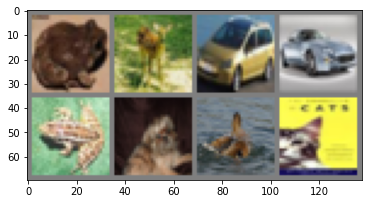

In [12]:
print(images.shape)
imshow(torchvision.utils.make_grid(images, nrow=4))
print(images.shape)
print( (torchvision.utils.make_grid(images)).shape)
print(''.join('%5s ' %classes[labels[j]] for j in range(8)))

In [14]:
trans = transforms.Compose([transforms.Resize((100,100)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
trainset = torchvision.datasets.ImageFolder(root='../../test', transform=trans)

In [15]:
len(trainset)

6

In [16]:
trainloader = DataLoader(trainset, batch_size=6, shuffle=False, num_workers=2)

In [17]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

torch.Size([6, 3, 100, 100])
(3, 206, 308)
(206, 308, 3)
torch.Size([6, 3, 100, 100])
torch.Size([3, 104, 614])
tensor(0) tensor(0) tensor(1) tensor(1) tensor(1) tensor(1) 


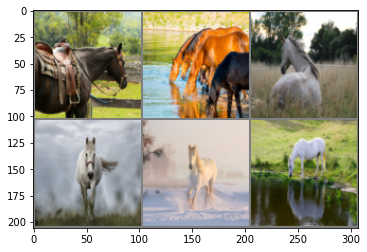

In [20]:
print(images.shape)
imshow(torchvision.utils.make_grid(images, nrow=3))
print(images.shape)
print((torchvision.utils.make_grid(images)).shape)
print(''.join('%5s ' %labels[j] for j in range(6)))

## Define the Network

Class 선언으로 사용하고자 하는 Network를 직접 구현할 수 있음.

Class로 선언할 Network에 필수 요소는?

`def __init__(self):`


`def forward(self,x):`


![image.png](3.png)

![image-2.png](4.png)

In [21]:
class my_network(nn.Module):
    def __init__(self):
        super(my_network, self).__init__()
        self.net_1 = nn.Conv2d(3,5,5)
        self.net_2 = nn.Conv2d(5,10,5)
    def forward(self,x):
        x = self.net_1(x)
        x = self.net_2(x)
        return x

In [22]:
imgs = 0
for n, (img, labels) in enumerate(trainloader):
    print(n, img.shape, labels.shape)
    imgs = img
    break

0 torch.Size([6, 3, 100, 100]) torch.Size([6])


In [23]:
my_net = my_network()

In [24]:
out = my_net(Variable(imgs))
print(out.shape)

torch.Size([6, 10, 92, 92])
